## HONGKONG LAND (H78.SI)
- Large market cap (8.9 bil)
- Low P/B compared to similar market cap companies
- Strong balance sheet
- Low Debt

### Benchmarking:
- Capitaland
- City Developments 



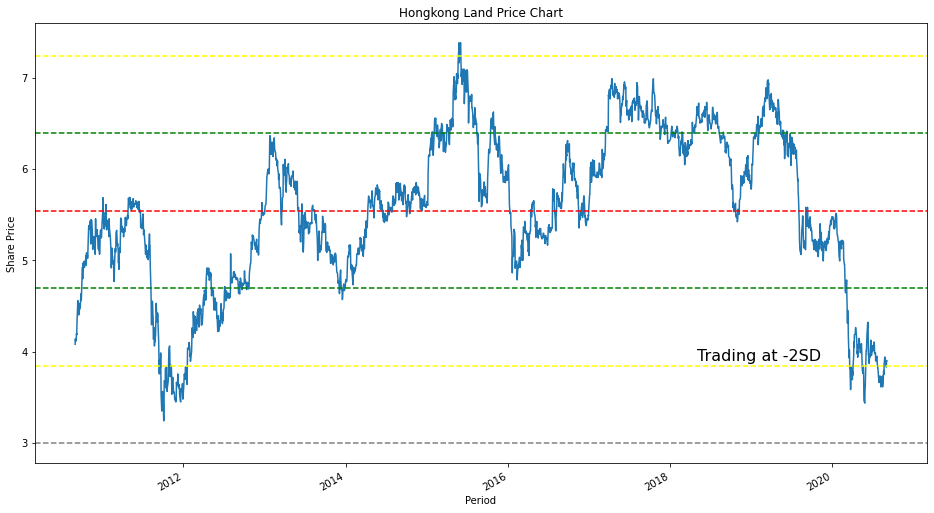

In [162]:
## import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import yfinance as yf

HKLinfo = yf.Ticker("H78.SI")

HKL = yf.download('H78.SI', 
                       start='2010-09-01', 
                       end='2020-09-03',
                       progress=False)

meanHKL = np.mean(HKL['Adj Close'])
sdHKL = np.std(HKL['Adj Close'])


HKL["Adj Close"].plot(figsize=(16, 9))
plt.title('Hongkong Land Price Chart')
plt.xlabel('Period')
plt.ylabel('Share Price')
plt.text('2018.5',3.9,'Trading at -2SD',fontsize=16)
plt.axhline(y = meanHKL, color = 'red', ls = '--')
plt.axhline(y = meanHKL + sdHKL, color = 'green', ls = '--')
plt.axhline(y = meanHKL + 2*sdHKL, color = 'yellow', ls = '--')
plt.axhline(y = meanHKL - sdHKL, color = 'green', ls = '--')
plt.axhline(y = meanHKL - 2*sdHKL, color = 'yellow', ls = '--')
plt.axhline(y = meanHKL - 3*sdHKL, color = 'grey', ls = '--')

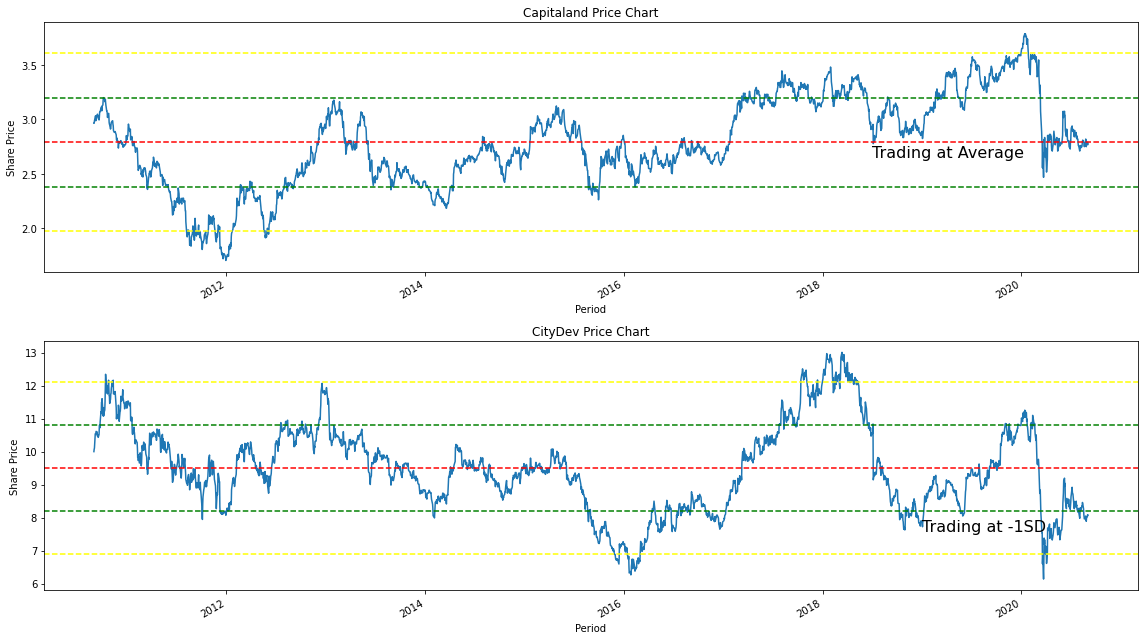

In [168]:
CD = yf.download('C09.SI', 
                       start='2010-09-01', 
                       end='2020-09-03',
                       progress=False)
CPL = yf.download('C31.SI', 
                       start='2010-09-01', 
                       end='2020-09-03',
                       progress=False)
meanCD = np.mean(CD['Adj Close'])
sdCD = np.std(CD['Adj Close'])

meanCPL = np.mean(CPL['Adj Close'])
sdCPL = np.std(CPL['Adj Close'])

plt.subplot(2,1,1)
CPL["Adj Close"].plot(figsize=(16, 9))
plt.title('Capitaland Price Chart')
plt.xlabel('Period')
plt.ylabel('Share Price')
plt.axhline(y = meanCPL, color = 'red', ls = '--')
plt.axhline(y = meanCPL + sdCPL, color = 'green', ls = '--')
plt.axhline(y = meanCPL + 2*sdCPL, color = 'yellow', ls = '--')
plt.axhline(y = meanCPL - sdCPL, color = 'green', ls = '--')
plt.axhline(y = meanCPL - 2*sdCPL, color = 'yellow', ls = '--')
plt.text('2018.7',2.65,'Trading at Average',fontsize=16)

plt.subplot(2,1,2)
CD["Adj Close"].plot(figsize=(16, 9))
plt.title('CityDev Price Chart')
plt.xlabel('Period')
plt.ylabel('Share Price')
plt.axhline(y=meanCD, color = 'red', ls = '--')
plt.axhline(y = meanCD + sdCD, color = 'green', ls = '--')
plt.axhline(y = meanCD + 2*sdCD, color = 'yellow', ls = '--')
plt.axhline(y = meanCD - sdCD, color = 'green', ls = '--')
plt.axhline(y = meanCD - 2*sdCD, color = 'yellow', ls = '--')
plt.text('2019',7.6,'Trading at -1SD',fontsize=16)

plt.tight_layout()

In [58]:
import pandas as pd
import numpy as np

url = r"https://sg.finance.yahoo.com/quote/%5ESTI/components?p=%5ESTI"
df_STI = pd.read_html(url)[0].reset_index()

for t in df_STI["Symbol"]:
    try:
        yfo = yf.Ticker(t)
        for k,v in yfo.info.items():
            if type(v) == list:
                pass
            else:
                df_STI.loc[df_STI["Symbol"] == t, k] = v
        print("{} completed".format(t))
    except:
        print("{} failed".format(t))
        continue
df_STI["Current Ratio"] = np.nan
df_STI["Debt to Current Asset"] = np.nan
for index, t in enumerate(df_STI["Symbol"]):
    try:
        yfo = yf.Ticker(t)
        df = pd.DataFrame(yfo.balance_sheet).transpose()
        val = df['Total Current Assets'].values[-1]/df['Total Current Liabilities'].values[-1]
        df_STI.at[index, 'Current Ratio'] = val
        val2 = (df['Short Long Term Debt'].values[-1] + df['Long Term Debt'].values[-1])/df['Total Current Assets'].values[-1]
        df_STI.at[index, "Debt to Current Asset"] = val2
    except:
        pass
df_STI.to_csv("STI.csv",index=False)

C52.SI completed
T39.SI failed
H78.SI completed
J36.SI completed
D05.SI completed
O39.SI failed
C09.SI completed
C07.SI failed
S68.SI completed
BN4.SI failed
S63.SI completed
V03.SI failed
U11.SI failed
U14.SI failed
M44U.SI completed
N2IU.SI completed
BS6.SI completed
S58.SI completed
C31.SI completed
G13.SI failed
Y92.SI completed
C6L.SI failed
Z74.SI failed
A17U.SI completed
C38U.SI completed
F34.SI completed
D01.SI completed
J37.SI completed
U96.SI failed
C61U.SI completed


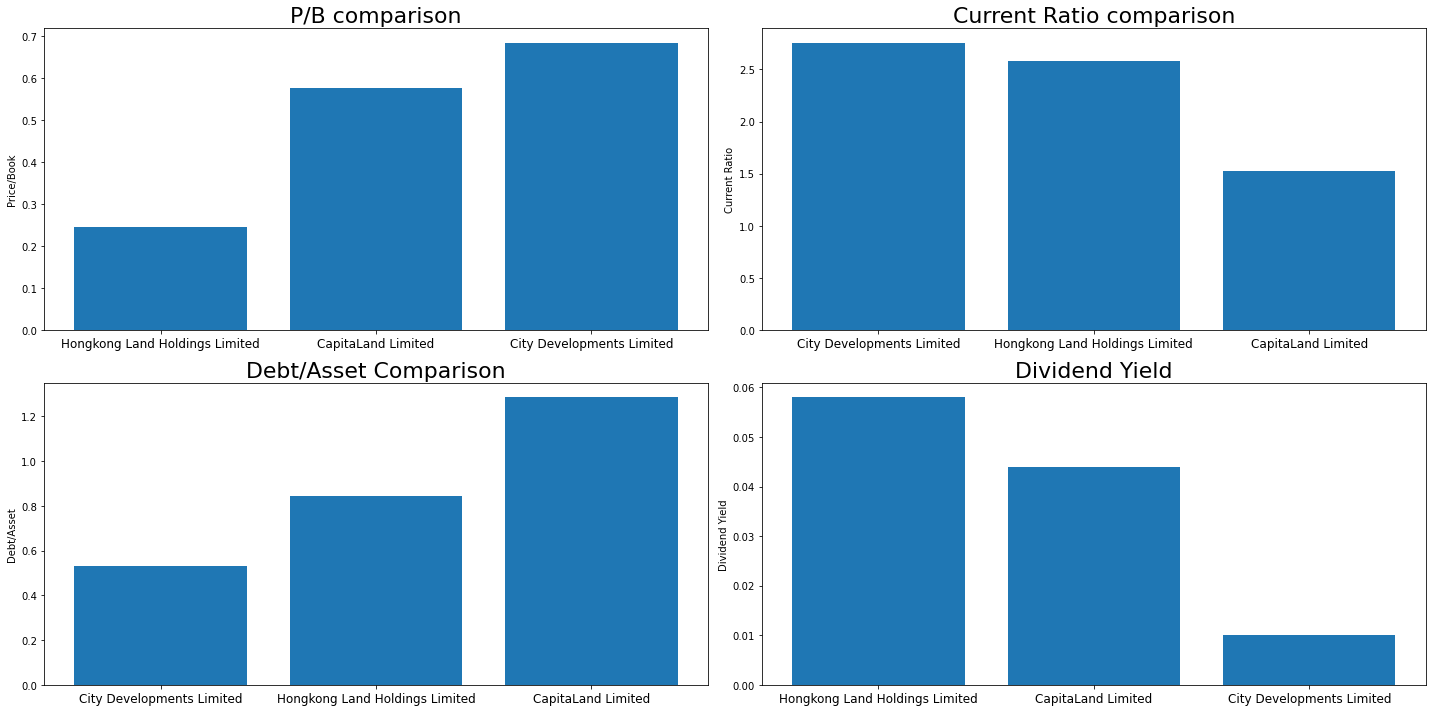

In [138]:
dataframe = pd.read_csv("STI_1.csv", index_col=2)
#print(dataframe.head(5))
#dataframe = dataframe[dataframe['Company name'].isin(['Hongkong Land Holdings Limited', 'CapitaLand Limited', "City Developments Limited"])]
df_PB = dataframe.sort_values('priceToBook',ascending=True)
df_CR = dataframe.sort_values('Current Ratio',ascending=False)
df_DA = dataframe.sort_values('Debt to Current Asset',ascending=True)
df_DY = dataframe.sort_values('trailingAnnualDividendYield',ascending=False)

fig=plt.figure(figsize=(20,10))
ax1= fig.add_subplot(2,2,1)
ax2= fig.add_subplot(2,2,2)
ax3= fig.add_subplot(2,2,3)
ax4= fig.add_subplot(2,2,4)

ax1.bar(df_PB.index, df_PB['priceToBook'])
ax1.set_xticklabels(df_PB.index, rotation=0, horizontalalignment='center', fontsize='12')
ax1.set_title('P/B comparison', fontsize=22)
ax1.set_ylabel('Price/Book') 

plt.tight_layout()

ax2.bar(df_CR.index, df_CR['Current Ratio'])
ax2.set_xticklabels(df_CR.index, rotation=0, horizontalalignment='center', fontsize='12')
ax2.set_title('Current Ratio comparison', fontsize=22)
ax2.set_ylabel('Current Ratio') 

plt.tight_layout()

ax3.bar(df_DA.index, df_DA['Debt to Current Asset'])
ax3.set_xticklabels(df_DA.index, rotation=0, horizontalalignment='center', fontsize='12')
ax3.set_title('Debt/Asset Comparison', fontsize=22)
ax3.set_ylabel('Debt/Asset') 

plt.tight_layout()

ax4.bar(df_DY.index, df_DY['trailingAnnualDividendYield'])
ax4.set_xticklabels(df_DY.index, rotation=0, horizontalalignment='center', fontsize='12')
ax4.set_title('Dividend Yield', fontsize=22)
ax4.set_ylabel('Dividend Yield') 
plt.tight_layout()

plt.show()


## GENTING SINGAPORE (G13.SI)
- Strong economic moat in Singapore versus Marina Bay Sand (Listed under parent group Las Vegas Sands Corp. in NYSE)
- Strong balance sheet
- Low Debt

Text(2018.3, 0.7, 'Trading at -1SD')

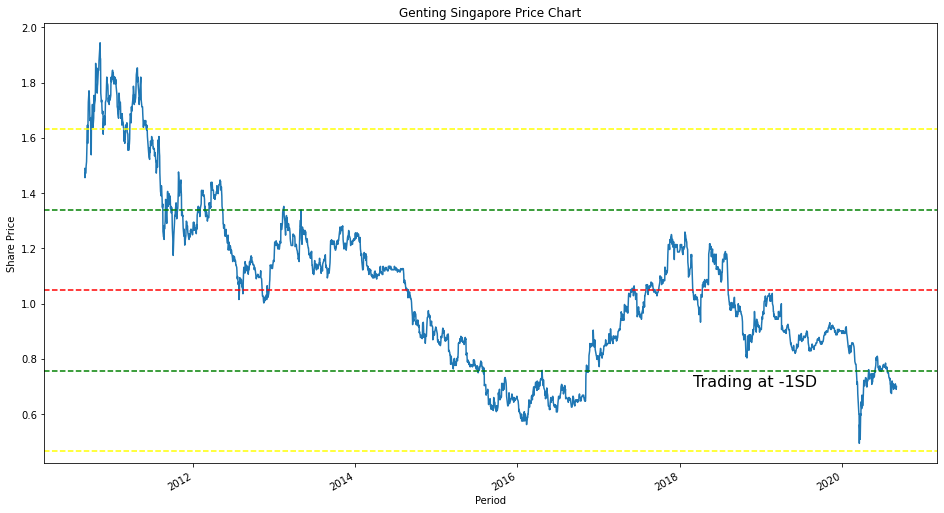

In [171]:
GSinfo = yf.Ticker("G13.SI")

GS = yf.download('G13.SI', 
                       start='2010-09-01', 
                       end='2020-09-03',
                       progress=False)
meanGS = np.mean(GS['Adj Close'])
sdGS = np.std(GS['Adj Close'])


GS["Adj Close"].plot(figsize=(16, 9))
plt.title('Genting Singapore Price Chart')
plt.xlabel('Period')
plt.ylabel('Share Price')

plt.axhline(y = meanGS, color = 'red', ls = '--')
plt.axhline(y = meanGS + sdGS, color = 'green', ls = '--')
plt.axhline(y = meanGS + 2*sdGS, color = 'yellow', ls = '--')
plt.axhline(y = meanGS - sdGS, color = 'green', ls = '--')
plt.axhline(y = meanGS - 2*sdGS, color = 'yellow', ls = '--')
plt.text('2018.3',0.7,'Trading at -1SD',fontsize=16)



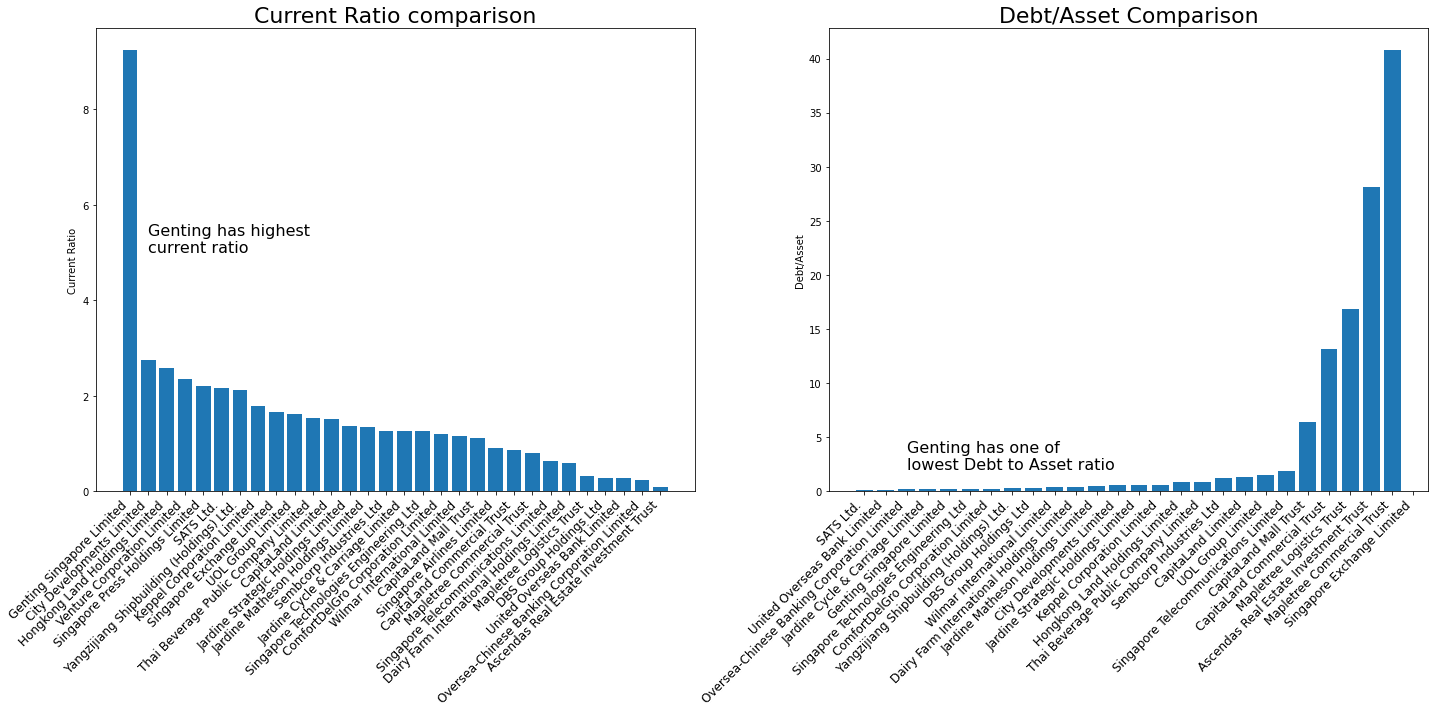

In [121]:
dataframe = pd.read_csv("STI.csv", index_col=2)
#print(dataframe.head(5))
df_CR = dataframe.sort_values('Current Ratio',ascending=False)
df_DA = dataframe.sort_values('Debt to Current Asset',ascending=True)

fig=plt.figure(figsize=(20,10))

ax2= fig.add_subplot(1,2,1)
ax3= fig.add_subplot(1,2,2)






ax2.bar(df_CR.index, df_CR['Current Ratio'])
ax2.set_xticklabels(df_CR.index, rotation=45, horizontalalignment='right', fontsize='12')
ax2.set_title('Current Ratio comparison', fontsize=22)
ax2.set_ylabel('Current Ratio') 
ax2.text(x=1, y=5, s="Genting has highest\ncurrent ratio", fontsize=16)

plt.tight_layout()

ax3.bar(df_DA.index, df_DA['Debt to Current Asset'])
ax3.set_xticklabels(df_DA.index, rotation=45, horizontalalignment='right', fontsize='12')
ax3.set_title('Debt/Asset Comparison', fontsize=22)
ax3.set_ylabel('Debt/Asset')
ax3.text(x=2, y=2, s="Genting has one of\nlowest Debt to Asset ratio", fontsize=16)

plt.tight_layout()


plt.show()
